# 3. Model building - Random Forest

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier


After obtaining cleaning up the data and selecting the variables, we will be trying to build a model to predict whether a stock if worth investing in depending on the column "Class". If class == 1, then it has a positive Price Var and its worth investing in. If class == 0, then it has a negative Price Var and its not worth investing in.

We will be using "Revenue", "EBITDA", "Profit Margin", "returnOnEquity", "Book Value per Share", "Operating Cash Flow", "Dividend Yield", "R&D Expenses" as our predictors.

In [3]:
df = pd.read_csv('2017_filtered.txt')
df

,Revenue,EBITDA,Profit Margin,returnOnEquity,Book Value per Share,Operating Cash Flow,Dividend Yield,R&D Expenses,PRICE VAR [%],Class,Sector
0,1.043100e+09,1.976520e+08,0.112000,0.1814,1.3210,3.790190e+08,0.0104,0.0,-11.859928,0,Consumer Defensive
1,1.275000e+09,3.150000e+08,0.152157,0.0656,9.9810,1.940000e+08,0.0000,0.0,22.699392,1,Consumer Defensive
2,2.348860e+09,2.915966e+08,0.084000,0.0737,12.2137,2.326531e+08,0.0000,0.0,-0.238669,0,Consumer Defensive
3,8.820600e+08,2.301880e+08,0.079000,0.0844,15.5270,1.486720e+08,0.0000,0.0,-29.642288,0,Consumer Defensive
4,1.327029e+09,1.546420e+08,-0.078000,-0.1298,6.4680,1.351300e+08,0.0000,0.0,-5.240649,0,Consumer Defensive
...,...,...,...,...,...,...,...,...,...,...,...
1936,1.438980e+08,1.411800e+07,0.031000,0.1042,6.2050,7.544000e+06,0.0000,0.0,34.893617,1,Technology
1937,6.257258e+07,5.511650e+05,0.004000,0.0347,3.9440,7.503710e+05,0.0000,0.0,-12.264152,0,Technology
1938,1.065240e+08,8.731000e+06,0.033000,0.2699,1.0150,2.076000e+06,0.0000,9224000.0,46.716421,1,Technology
1939,1.040000e+08,5.000000e+06,-0.019231,0.0656,9.9810,-7.000000e+06,0.0000,0.0,-32.220041,0,Technology


In [4]:
y = pd.DataFrame(df["Class"])

predictors = pd.DataFrame(df[["Revenue", "EBITDA", "Profit Margin", "returnOnEquity", "Book Value per Share", 
                                 "Operating Cash Flow", "Dividend Yield", "R&D Expenses"]])
X = predictors

<ipython-input-11-f933f0314320>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(X_train, y_train)                         # train the model


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7711340206185567
True Postitive Rate 		: 0.017699115044247787
True Negative Rate 		: 1.0
False Negative Rate 		: 0.9823008849557522
False Postitive Rate 		: 0.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7736625514403292
True Postitive Rate 		: 0.0
True Negative Rate 		: 1.0
False Negative Rate 		: 1.0
False Postitive Rate 		: 0.0



<AxesSubplot:>

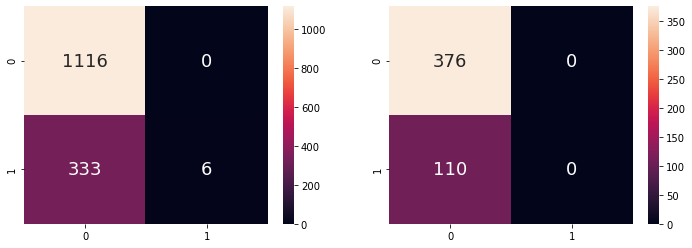

In [11]:
rforest = RandomForestClassifier(n_estimators = 500,  # n_estimators denote number of trees
                                 max_depth = 6)       # set the maximum depth of each tree

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 4)  # create the object
rforest.fit(X_train, y_train)                         # train the model

# Predict Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

#Getting the confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred)

TP_train = train_confusion[1][1]
FN_train = train_confusion[1][0]
TN_train = train_confusion[0][0]
FP_train = train_confusion[0][1]

test_confusion = confusion_matrix(y_test, y_test_pred)

TP_test = test_confusion[1][1]
FN_test = test_confusion[1][0]
TN_test = test_confusion[0][0]
FP_test = test_confusion[0][1]

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print("True Postitive Rate \t\t:", TP_train/(TP_train+FN_train))
print("True Negative Rate \t\t:", TN_train/(TN_train+FP_train))
print("False Negative Rate \t\t:", FN_train/(FN_train+TP_train))
print("False Postitive Rate \t\t:", FP_train/(FP_train+TN_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print("True Postitive Rate \t\t:", TP_test/(TP_test+FN_test))
print("True Negative Rate \t\t:", TN_test/(TN_test+FP_test))
print("False Negative Rate \t\t:", FN_test/(FN_test+TP_test))
print("False Postitive Rate \t\t:", FP_test/(FP_test+TN_test))
print()


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(train_confusion,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(test_confusion, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Utilizing the random forest model, we managed to obtain a classification accuracy of around 0.77 for the training data set and a classification accuracy of around 0.77 for the test data set. 
Both of which are strongly(?) accurate. 

The random forest model also has a very low true positive rate of 0.01 for the train and 0for the test data sets. 
However, the true negative rate is very high at 1 for the train and 1 for the test data set. Therefore, there is a large amount of data that is not being correctly classified as positives. As such, a better model is needed to improve on these rates. We thus, turn to Grid Search.